In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# Clone the CycleGAN repository and install requirements
!git clone https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix.git
%cd pytorch-CycleGAN-and-pix2pix
!pip install -r requirements.txt


Cloning into 'pytorch-CycleGAN-and-pix2pix'...
remote: Enumerating objects: 2516, done.
remote: Total 2516 (delta 0), reused 0 (delta 0), pack-reused 2516 (from 1)
Receiving objects: 100% (2516/2516), 8.20 MiB | 36.83 MiB/s, done.
Resolving deltas: 100% (1575/1575), done.
/kaggle/working/pytorch-CycleGAN-and-pix2pix
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 26.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - \ done
  Created wheel for visdom: filename=visdom-0.2.4-py3-none-any.whl size=1408195 sha256=1ce16e30a2ecd74aff46f51c201d0d72eb2a098c9274ac3e73a3f20f6fbb8511
  Stored in directory: /root/.cache/pip/wheels/42/29/49/5bed207bac4578e4d2c0c5fc0226bfd33a7e2953ea56356855
Successfully built visdom


In [3]:
import os
import shutil

os.makedirs('/kaggle/working/dataset/trainA', exist_ok=True)
os.makedirs('/kaggle/working/dataset/trainB', exist_ok=True)

hazy_images_path = '/kaggle/input/kdn-dataset/Dense_Haze_NTIRE19/hazy'
dehazed_images_path = '/kaggle/input/kdn-dataset/Dense_Haze_NTIRE19/GT'

for img_file in os.listdir(hazy_images_path):
    shutil.copy(os.path.join(hazy_images_path, img_file), f"/kaggle/working/dataset/trainA/{img_file}")
for img_file in os.listdir(dehazed_images_path):
    shutil.copy(os.path.join(dehazed_images_path, img_file), f"/kaggle/working/dataset/trainB/{img_file}")


In [4]:
!python train.py --dataroot /kaggle/working/dataset --name dehazing_task --model cycle_gan \
                 --load_size 256 --crop_size 256 --input_nc 3 --output_nc 3 \
                 --n_epochs 50 --n_epochs_decay 50


----------------- Options ---------------
               batch_size: 1                             
                    beta1: 0.5                           
          checkpoints_dir: ./checkpoints                 
           continue_train: False                         
                crop_size: 256                           
                 dataroot: /kaggle/working/dataset       	[default: None]
             dataset_mode: unaligned                     
                direction: AtoB                          
              display_env: main                          
             display_freq: 400                           
               display_id: 1                             
            display_ncols: 4                             
             display_port: 8097                          
           display_server: http://localhost              
          display_winsize: 256                           
                    epoch: latest                        
              

In [5]:
from shutil import make_archive

make_archive('dehazing_model_checkpoints', 'zip', '/kaggle/working/pytorch-CycleGAN-and-pix2pix/checkpoints/dehazing_task')


'/kaggle/working/pytorch-CycleGAN-and-pix2pix/dehazing_model_checkpoints.zip'

In [6]:
os.makedirs('/kaggle/working/inference_images/testA/', exist_ok=True)
os.makedirs('/kaggle/working/inference_images/testB/', exist_ok=True)
infer_images_path = '/kaggle/input/kdn-dataset/infer/testA'

for img_file in os.listdir(infer_images_path):
    shutil.copy(os.path.join(infer_images_path, img_file), f"/kaggle/working/inference_images/testA/{img_file}")
    
infer_images_path = '/kaggle/input/kdn-dataset/infer/testB'
for img_file in os.listdir(infer_images_path):
    shutil.copy(os.path.join(infer_images_path, img_file), f"/kaggle/working/inference_images/testB/{img_file}")

In [7]:
!python test.py --dataroot /kaggle/working/inference_images --name dehazing_task \
                --model cycle_gan --load_size 256 --crop_size 256 \
                --results_dir /kaggle/working/results


----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: /kaggle/working/inference_images	[default: None]
             dataset_mode: unaligned                     
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0                          

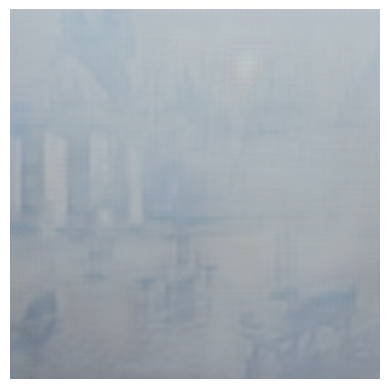

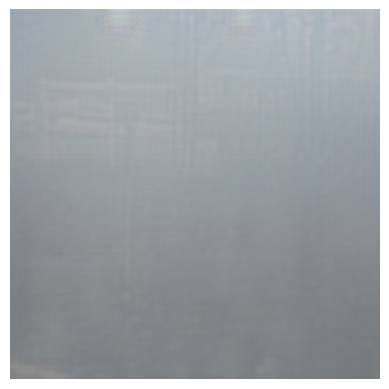

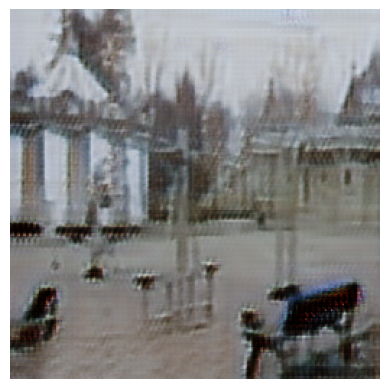

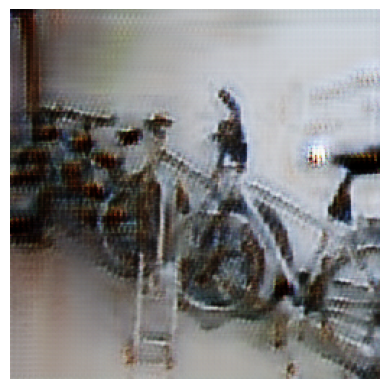

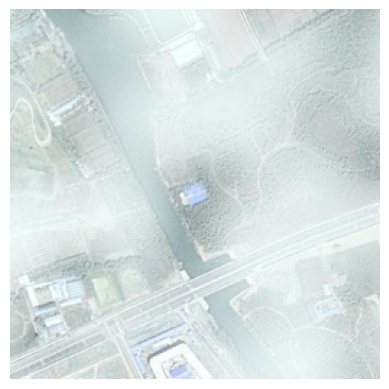

In [8]:
import matplotlib.pyplot as plt
import os
from PIL import Image

result_images_path = '/kaggle/working/results/dehazing_task/test_latest/images'
images = [Image.open(os.path.join(result_images_path, img)) for img in os.listdir(result_images_path) if img.endswith('.png')]

# Display the first few results
for img in images[:5]:
    plt.imshow(img)
    plt.axis('off')
    plt.show()
